In [1]:
#Bmore_COVID_EDA_Part2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

zipData = pd.read_csv('ZipData_CLEANED.csv')

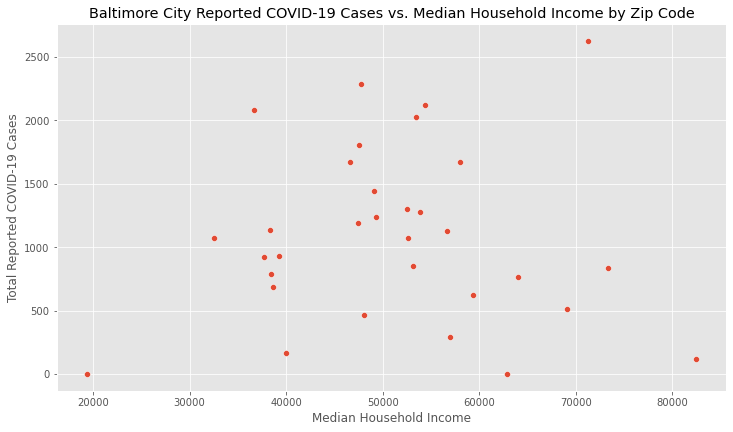

[[1.         0.01453681]
 [0.01453681 1.        ]]


In [2]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='MHINC',y='TotalCases',data=zipData,legend=False)
_ = plt.xlabel('Median Household Income')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Median Household Income by Zip Code')
plt.show()

corr = np.corrcoef(zipData[['MHINC','TotalCases']],rowvar=False)
print(corr)

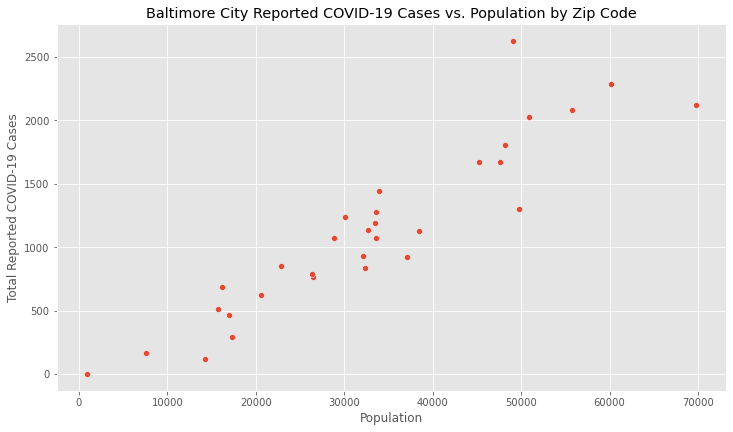

[[1.         0.92414015]
 [0.92414015 1.        ]]


In [3]:
#remove outliers
y = zipData['Pop2010']
removed_outliers_pop = y.between(y.quantile(.05), y.quantile(.95))
zipData = zipData[zipData['Pop2010'] != removed_outliers_pop]

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=zipData,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()

corr = np.corrcoef(zipData[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [4]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [5]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(zipData['Pop2010'].to_numpy(),zipData['TotalCases'].to_numpy(),200)

#95% C.I. for regression line slopes
cis95 = np.percentile(bs_slope_reps,[2.5,97.5])
print(cis95)

[0.03310588 0.04582857]


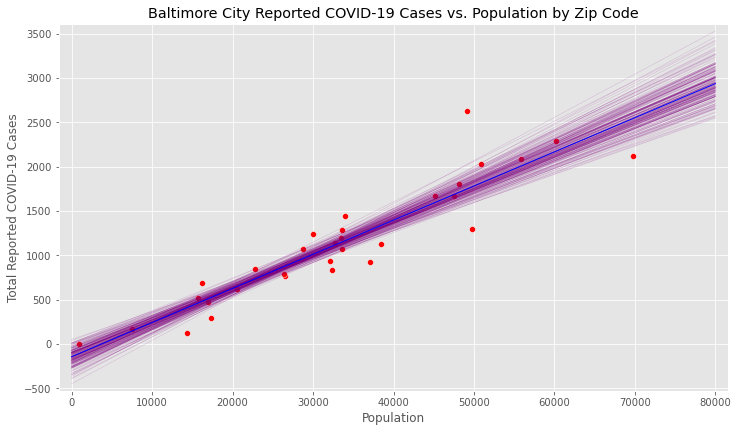

[[1.         0.92414015]
 [0.92414015 1.        ]]


In [6]:
#linear regression with 200 bootstrap lines 
a,b = np.polyfit(zipData['Pop2010'],zipData['TotalCases'],1)
x = np.array([0,80000])
y = a * x + b

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
for i in range(200):
    _ = plt.plot(x,bs_slope_reps[i]*x + bs_intercept_reps[i],
                linewidth=0.5,alpha=0.2,color='purple')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=zipData,legend=False,color='red')
_ = plt.plot(x,y,linewidth=1, color='blue')
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.margins(.02)
plt.show()

corr = np.corrcoef(zipData[['Pop2010','TotalCases']],rowvar=False)
print(corr)

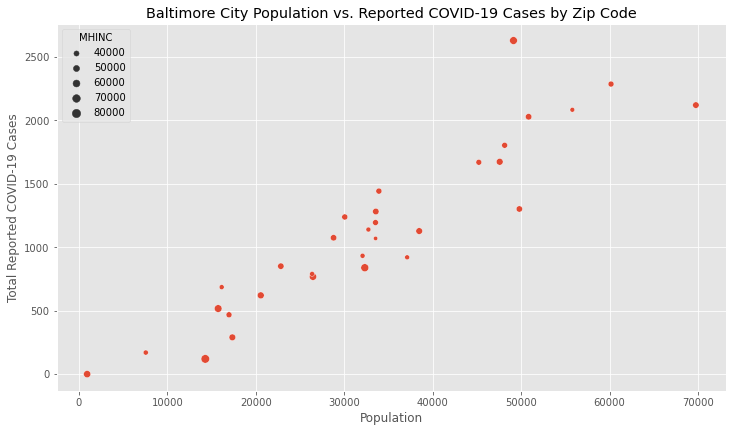

[[1.         0.92414015]
 [0.92414015 1.        ]]


In [7]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=zipData,size='MHINC',legend='brief')
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Population vs. Reported COVID-19 Cases by Zip Code')
plt.show()

corr = np.corrcoef(zipData[['Pop2010','TotalCases']],rowvar=False)
print(corr)